# EDA данных для задачи на регрессии

<font size=4><b>Цель проекта</b> - обработка данных, анализ и определение факторов, влияющих на установку бомбы в компьютерной игре CS:GO</font>

<h1>Содержание<span class="tocSkip"></span></h1>

<br>
<font size=4>
1.1 Инициализация<br>
1.1.1 Загрузка данных<br>
1.1.2 Исследование исходных данных<br>
1.1.3 Выводы и дальнейшие шаги<br>
1.2 Обработка пропущенных значений (если таковые имеются)<br>
1.3 Коррекция типов данных<br>
1.4 Обогащение данных<br>
1.5 Проверка данных<br>
1.6 Исследование основных параметров<br>
1.7 Изучение и обработка выбросов<br>
1.8 Исследование основных параметров без выбросов<br>
1.9 Нахождение зависимостей 'bomb_planted' с другими признаками<br>
1.10 Общий вывод<br>
</font>

## Инициализация проекта

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv('csgo_task.csv')

# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `time_left` - сколько прошло времени
- `ct_score` - количество раундов, выигранных командой CT (Counter-Terrorists) 
- `t_score` - количество раундов, выигранных командой T (Terrorists)
- `map` - название карты
- `bomb_planted` - была ли заложена бомба
- `ct_health` - суммарное здоровье команды CT
- `t_health` - суммарное здоровье команды T
- `ct_armor` - суммарное количество брони у команды CT
- `t_armor` - суммарное количество брони у команды T
- `ct_money` - общая сумма денег у команды CT
- `t_money` - общая сумма денег у команды T
- `ct_helmets` - количество игроков CT с касками
- `t_helmets` - количество игроков T с касками
- `ct_defuse_kits` - количество наборов для разминирования у CT
- `ct_players_alive` - количество живых игроков в команде CT
- `t_players_alive` - количество живых игроков в команде T
</font>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [5]:
data.head(20)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


<font size=4><b>Полученная характеристика исходных данных:</b>

- в столбцах 't_score', 'map', 't_health', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 't_players_alive' отсутствуют значения;

<font size=4>Столбцы с неподходящими типами данных:

- изменение типа данных столбца 'ct_score' с float на int;
- изменение типа данных столбца 't_score' с float на int;
- изменение типа данных столбца 'map' с object на str;
- изменение типа данных столбца 'ct_health' с float на int;
- изменение типа данных столбца 't_health' с float на int;
- изменение типа данных столбца 'ct_armor' с float на int;
- изменение типа данных столбца 't_armor' с float на int;
- изменение типа данных столбца 'ct_money' с float на int;
- изменение типа данных столбца 't_money' с float на int;
- изменение типа данных столбца 'ct_helmets' с float на int;
- изменение типа данных столбца 't_helmets' с float на int;
- изменение типа данных столбца 'ct_defuse_kits' с float на int;
- изменение типа данных столбца 'ct_players_alive' с float на int;
- изменение типа данных столбца 't_players_alive' с float на int;</font>

<font size=4> Краткое описание пропущенных значений во всех столбцах:

В общем и целом датасет является полноценным, за исключением того что у половины столбцов есть небольшое количество пропущенных значений, где столбец 'map' содержит название карты, а остальные столбцы содержат некоторое целое число.</font>

# <font> Выводы и дальнейшие шаги</font>

Вывод <b>описательной статистики</b> для кадра данных pandas.
<br> Описательная статистика отображается для всех числовых столбцов в кадре данных. Если в каких-либо столбцах отсутствуют значения (NaN), Pandas автоматически исключат эти значения при расчете описательной статистики.
<br>
Для числовых данных результат будет включать count (количество), mean (среднее), std (стандартное отклонение), min, max, а также нижний, 50 -й и верхний процентили. По умолчанию <i>нижний процентиль</i> равен 25 , а <i>верхний процентиль</i> равен 75 . 50 - й процентиль <i>совпадает с медианой</i>.

In [6]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
count,122410.000000,122410.000000,121386.000000,122410.000000,121627.000000,122410.000000,122410.000000,122410.000000,122410.000000,121766.000000,121560.000000,121766.000000,122410.000000,122182.000000
mean,97.886922,6.709239,6.785412,412.106568,402.724773,314.142121,298.444670,9789.023773,11241.036680,2.054794,2.772869,1.613447,4.273752,4.266038
std,54.465238,4.790362,4.824752,132.293290,139.911535,171.029736,174.576545,11215.042286,12162.806759,1.841505,2.011093,1.605278,1.205500,1.228508
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,3.000000,1.000000,5.000000,5.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,5.000000,3.000000,5.000000,5.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,5.000000,5.000000,6.000000


<b>Следующий шаг:</b>

- Обработка пропущенных значений.
- Изменить тип значений всех столбцов с таким типом как float кроме 'time_left' на int;

# Обработка пропущенных значений

In [7]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

t_score             0.836533
t_helmets           0.694388
t_health            0.639654
ct_helmets          0.526101
ct_defuse_kits      0.526101
t_players_alive     0.186259
map                 0.172372
ct_score            0.000000
ct_armor            0.000000
ct_health           0.000000
bomb_planted        0.000000
time_left           0.000000
t_money             0.000000
ct_money            0.000000
t_armor             0.000000
ct_players_alive    0.000000
dtype: float64

In [8]:
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


<font size=4><b>Недостающее значение данных в следующих столбцах:</b>

- t_score
- t_helmets
- t_health
- ct_helmets 
- ct_defuse_kits
- t_players_alive
- map</font>

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

- Обработать пропущенные значения в столбцах 't_score', 't_helmets', 't_health', 'ct_helmets', 'ct_defuse_kits', 't_players_alive';
- Заполнить пропущенные значения в столбце 't_score' на основе 'ct_score' и 'map';
- Заполнить пропущенные значения в столбце 't_players_alive' на основе 't_score', 'ct_score';
- Заполнить пропущенные значения в столбце 't_helmets' на основе 't_armor', 't_money';
- Заполнить пропущенные значения в столбце 't_health' на основе 't_armor', 't_helmets';
- Заполнить пропущенные значения в столбце 'ct_helmets' аналогично 't_helmets';
- Заполнить пропущенные значения в столбце 'ct_defuse_kits' на основе 'ct_players', 'ct_money';
- Заполнить пропущенные значения в столбце 'map' на 'unknown' т.к. связи с другими признаками датасета отсутствует, а так же количество пропущенных значений очень мало, значит такое заполнение практически не повлияет на статистику.

In [9]:
# Обработка пропущенных значений в столбце 't_score' для каждой карты и счёта CT

f = lambda x: x.median().round() if x.notna().any() else np.nan
grouped_t_score = data.groupby(["map", "ct_score"])["t_score"].transform(f)
data["t_score"] = data["t_score"].fillna(grouped_t_score)

# Т.к. после заполнения осталось ещё 2 NaN строки, поэтому заменю их на 0

data["t_score"] = data['t_score'].fillna(0)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [10]:
# Обработка пропущенных значений в столбце 't_score' для каждой пары 'ct_score', 't_score'

grouped_t_players_alive = data.groupby(['t_score', 'ct_score'])['t_players_alive'].transform(f)
data["t_players_alive"] = data["t_players_alive"].fillna(grouped_t_players_alive)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [11]:
# Обработка пропущенных значений в столбце 't_helmets' для каждой пары 't_armor', 't_money'

grouped_t_helmets = data.groupby(['t_armor'])['t_helmets'].transform(f)
data["t_helmets"] = data["t_helmets"].fillna(grouped_t_helmets)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [12]:
# Обработка пропущенных значений в столбце 't_health' для каждой пары 't_armor'

grouped_t_health = data.groupby(['t_armor', 't_helmets'])['t_health'].transform(f)
data["t_health"] = data["t_health"].fillna(grouped_t_health)

# Т.к. после заполнения осталось ещё 2 NaN строки, поэтому заменю их на 0

data["t_health"] = data['t_health'].fillna(0)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [13]:
# Обработка пропущенных значений в столбце 'ct_helmets' для каждой пары 'ct_armor'

grouped_ct_helmets = data.groupby(['ct_armor'])['ct_helmets'].transform(f)
data["ct_helmets"] = data["ct_helmets"].fillna(grouped_ct_helmets)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [14]:
# Обработка пропущенных значений в столбце 'ct_defuse_kits' для каждой пары 'ct_players_alive', 'ct_money'

grouped_ct_defuse_kits = data.groupby(['ct_players_alive', 'ct_money'])['ct_defuse_kits'].transform(f)
data["ct_defuse_kits"] = data["ct_defuse_kits"].fillna(grouped_ct_defuse_kits)

# Т.к. после заполнения осталось ещё 4 NaN строки, поэтому заменю их на 0

data["ct_defuse_kits"] = data['ct_defuse_kits'].fillna(0)
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4.0,14.0,de_dust2,False,100.0,300.0,100.0,379.0,0.0,15650.0,0.0,4.0,1.0,1.0,4.0
96,24.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
97,4.94,4.0,14.0,de_dust2,True,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0
98,174.96,4.0,15.0,de_dust2,False,500.0,500.0,91.0,195.0,18000.0,36100.0,0.0,2.0,1.0,5.0,5.0


In [15]:
# Замена пропущенных значений в столбце 'map' на 'unknown'

data['map'] = data['map'].fillna('unknown')
data['map'].value_counts()

map
de_inferno     23768
de_dust2       22101
de_nuke        18997
de_mirage      18547
de_overpass    14056
de_train       13471
de_vertigo     11115
unknown          211
de_cache         144
Name: count, dtype: int64

In [16]:
data.isna().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

## Коррекция типов данных

Т.к. данные полные, то можно скорректировать типы данных

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           122410 non-null  float64
 3   map               122410 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          122410 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        122410 non-null  float64
 12  t_helmets         122410 non-null  float64
 13  ct_defuse_kits    122410 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122410 non-null  float64
dtypes: bool(1), float64(

In [18]:
# Замена float на int

data['ct_score'] = data['ct_score'].astype(int)
data['t_score'] = data['t_score'].astype(int)
data['ct_health'] = data['ct_health'].astype(int)
data['t_health'] = data['t_health'].astype(int)
data['ct_armor'] = data['ct_armor'].astype(int)
data['t_armor'] = data['t_armor'].astype(int)
data['t_money'] = data['t_money'].astype(int)
data['ct_money'] = data['ct_money'].astype(int)
data['ct_helmets'] = data['ct_helmets'].astype(int)
data['t_helmets'] = data['t_helmets'].astype(int)
data['ct_defuse_kits'] = data['ct_defuse_kits'].astype(int)
data['ct_players_alive'] = data['ct_players_alive'].astype(int)
data['t_players_alive'] = data['t_players_alive'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  int64  
 2   t_score           122410 non-null  int64  
 3   map               122410 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  int64  
 6   t_health          122410 non-null  int64  
 7   ct_armor          122410 non-null  int64  
 8   t_armor           122410 non-null  int64  
 9   ct_money          122410 non-null  int64  
 10  t_money           122410 non-null  int64  
 11  ct_helmets        122410 non-null  int64  
 12  t_helmets         122410 non-null  int64  
 13  ct_defuse_kits    122410 non-null  int64  
 14  ct_players_alive  122410 non-null  int64  
 15  t_players_alive   122410 non-null  int64  
dtypes: bool(1), float64(

**Заключение**
- тип данных во всех столбцах с типом данных float кроме 'time_left' исправлены на int, т.к. логически они не требуют десятичной формы записи.

## Обогащение данных

Рассмотрим доп. факторы, которые необходимо добавить в данные чтобы облегчить поведение EDA.
Из таких пар столбцов можно вычислить лидирующую команду: {'ct_health', 't_health'}; {'ct_armor', 't_armor'}; {'ct_money', 't_money'}, {'ct_helmets', 't_helmets'}; {'ct_players_alive', 't_players_alive'}.

In [19]:
# Добавление столбца 'health_lead', в котором записано значение {0, 1, 2}, где 0 - CT, 1 - T, 2 - Tie

data['health_lead'] = np.where(data['ct_health'] > data['t_health'], 0, np.where(data['t_health'] > data['ct_health'], 1, 2))
data['health_lead'].value_counts()

health_lead
2    59951
0    35615
1    26844
Name: count, dtype: int64

In [20]:
# Добавление столбца 'armor_lead', в котором записано значение {0, 1, 2}, где 0 - CT, 1 - T, 2 - Tie

data['armor_lead'] = np.where(data['ct_armor'] > data['t_armor'], 0, np.where(data['t_armor'] > data['ct_armor'], 1, 2))
data['armor_lead'].value_counts()

armor_lead
0    60859
1    52416
2     9135
Name: count, dtype: int64

In [21]:
# Добавление столбца 'money_lead', в котором записано значение {0, 1, 2}, где 0 - CT, 1 - T, 2 - Tie

data['money_lead'] = np.where(data['ct_money'] > data['t_money'], 0, np.where(data['t_money'] > data['ct_money'], 1, 2))
data['money_lead'].value_counts()

money_lead
1    64957
0    54571
2     2882
Name: count, dtype: int64

In [22]:
# Добавление столбца 'helmets_lead', в котором записано значение {0, 1, 2}, где 0 - CT, 1 - T, 2 - Tie

data['helmets_lead'] = np.where(data['ct_helmets'] > data['t_helmets'], 0, np.where(data['t_helmets'] > data['ct_helmets'], 1, 2))
data['helmets_lead'].value_counts()

helmets_lead
1    60750
0    30842
2    30818
Name: count, dtype: int64

In [23]:
# Добавление столбца 'player_alive_lead', в котором записано значение {0, 1, 2}, где 0 - CT, 1 - T, 2 - Tie

data['players_alive_lead'] = np.where(data['ct_players_alive'] > data['t_players_alive'], 0, np.where(data['t_players_alive'] > data['ct_players_alive'], 1, 2))
data['players_alive_lead'].value_counts()

players_alive_lead
2    81308
0    20787
1    20315
Name: count, dtype: int64

In [24]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,health_lead,armor_lead,money_lead,helmets_lead,players_alive_lead
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,5,5,2,2,2,2,2
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,1,5,5,2,0,1,2,2
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,1,5,5,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11,14,de_train,True,200,242,195,359,100,...,2,4,1,2,4,1,1,1,1,1
122406,174.93,11,15,de_train,False,500,500,95,175,11500,...,1,2,1,5,5,2,1,1,1,2
122407,114.93,11,15,de_train,False,500,500,495,475,1200,...,3,5,1,5,5,2,0,1,1,2
122408,94.93,11,15,de_train,False,500,500,495,475,1200,...,3,5,1,5,5,2,0,1,1,2


### **Проверка "очищенных" данных**

In [25]:
# Проверка дубликатов

data.duplicated().sum()

np.int64(5780)

Т.к. датасет содержит дубликаты, необходимо их удалить.

In [26]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

Теперь данные готовы к обработке, проверим сводную информацию.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116630 entries, 0 to 122409
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time_left           116630 non-null  float64
 1   ct_score            116630 non-null  int64  
 2   t_score             116630 non-null  int64  
 3   map                 116630 non-null  object 
 4   bomb_planted        116630 non-null  bool   
 5   ct_health           116630 non-null  int64  
 6   t_health            116630 non-null  int64  
 7   ct_armor            116630 non-null  int64  
 8   t_armor             116630 non-null  int64  
 9   ct_money            116630 non-null  int64  
 10  t_money             116630 non-null  int64  
 11  ct_helmets          116630 non-null  int64  
 12  t_helmets           116630 non-null  int64  
 13  ct_defuse_kits      116630 non-null  int64  
 14  ct_players_alive    116630 non-null  int64  
 15  t_players_alive     116630 non-null  in

In [28]:
data.head(100)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,health_lead,armor_lead,money_lead,helmets_lead,players_alive_lead
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,5,5,2,2,2,2,2
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,1,5,5,2,0,1,2,2
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,1,5,5,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.97,4,14,de_dust2,False,100,300,100,379,0,...,0,4,1,1,4,1,1,1,1,1
96,24.94,4,14,de_dust2,True,28,147,93,195,600,...,0,2,1,1,2,1,1,1,1,1
97,4.94,4,14,de_dust2,True,28,147,93,195,600,...,0,2,1,1,2,1,1,1,1,1
98,174.96,4,15,de_dust2,False,500,500,91,195,18000,...,0,2,1,5,5,2,1,1,1,2


Данные выглядят "чистыми" и готовы к EDA.

# EDA

## Исследование основных параметров раунда CS:GO

Параметры:
- Длительность раунда;
- Счёт CT/T;
- Здоровье CT/T;
- Броня CT/T;
- Количество денег CT/T
- Количество живых игроков CT/T

На эти перечисленные параметры будет обращено особое внимание с помощью гистограмм. Здесь выбросы будут влиять на форму и читаемость гистограмм.

In [29]:
data.describe()[['time_left', 't_score', 'ct_score', 't_health', 'ct_health', 't_armor', 'ct_armor', 't_money', 'ct_money', 't_players_alive', 'ct_players_alive']]

,time_left,t_score,ct_score,t_health,ct_health,t_armor,ct_armor,t_money,ct_money,t_players_alive,ct_players_alive
count,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000,116630.000000
mean,94.106078,6.833705,6.777124,397.962720,407.890466,304.406722,319.663989,11519.381806,10017.496356,4.231664,4.239158
std,53.002650,4.823871,4.803529,141.583558,134.084524,173.117801,169.133518,12213.629509,11271.212300,1.246754,1.224145
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.900000,3.000000,3.000000,306.000000,332.000000,181.000000,196.000000,1650.000000,1300.000000,4.000000,4.000000
50%,94.870000,6.000000,6.000000,499.000000,500.000000,356.000000,384.000000,7750.000000,6000.000000,5.000000,5.000000
75%,114.960000,11.000000,10.000000,500.000000,500.000000,471.000000,487.000000,18400.000000,15100.000000,5.000000,5.000000
max,175.000000,33.000000,32.000000,600.000000,500.000000,500.000000,500.000000,80000.000000,80000.000000,6.000000,5.000000


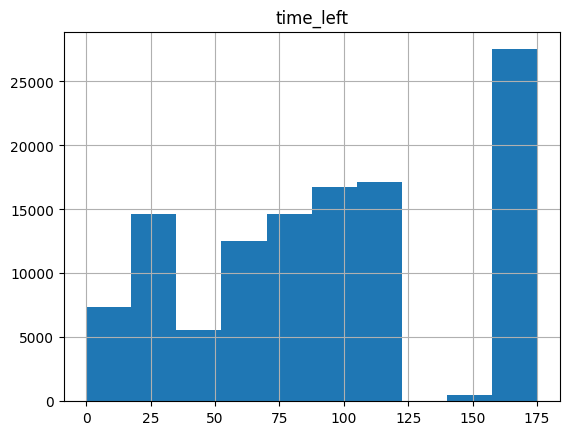

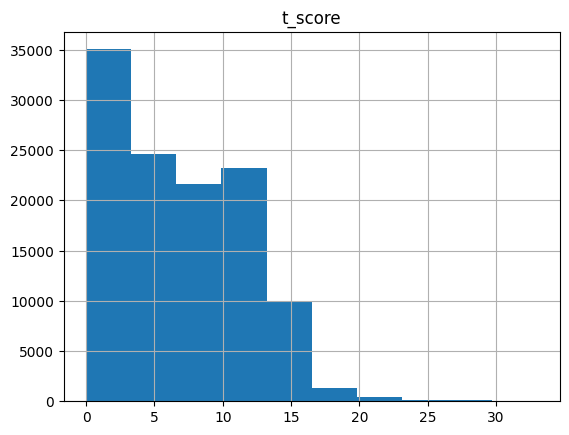

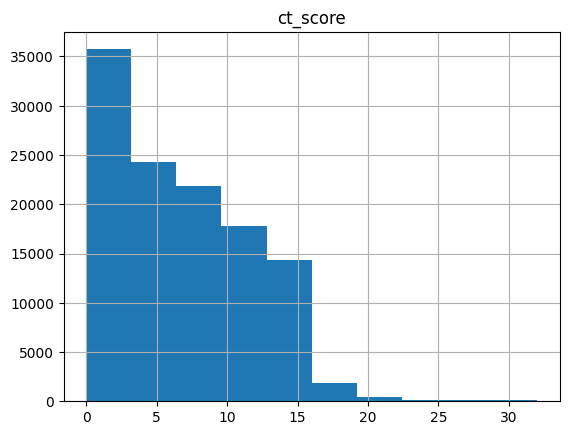

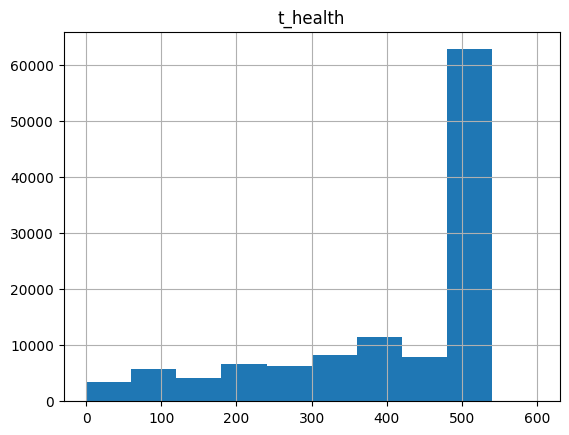

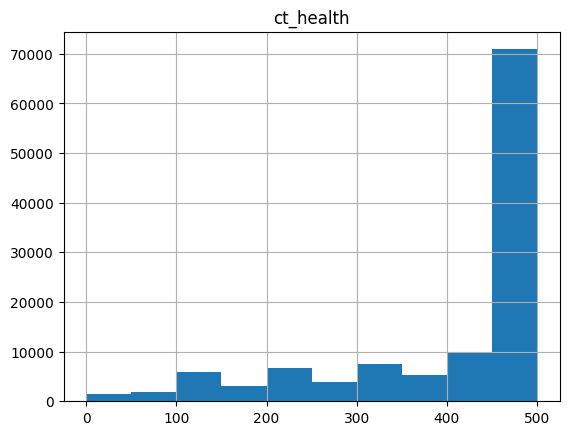

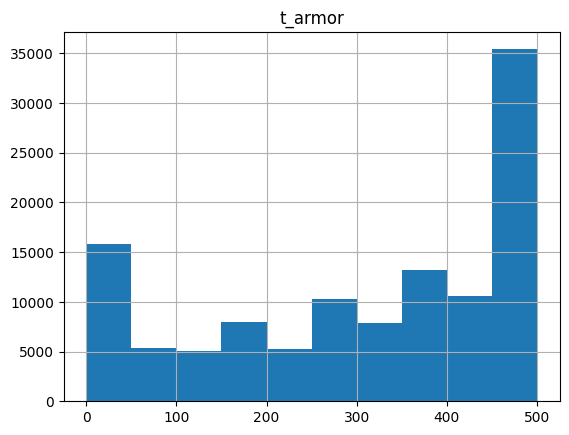

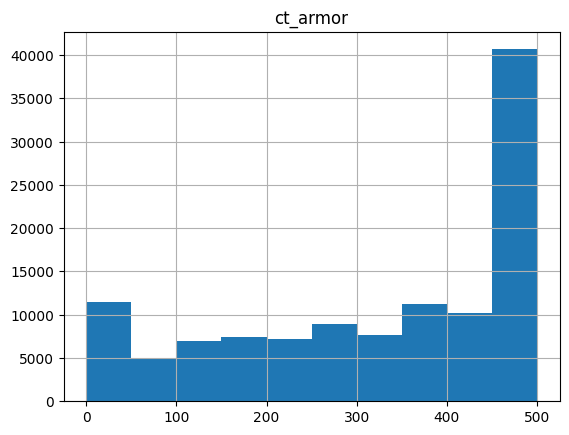

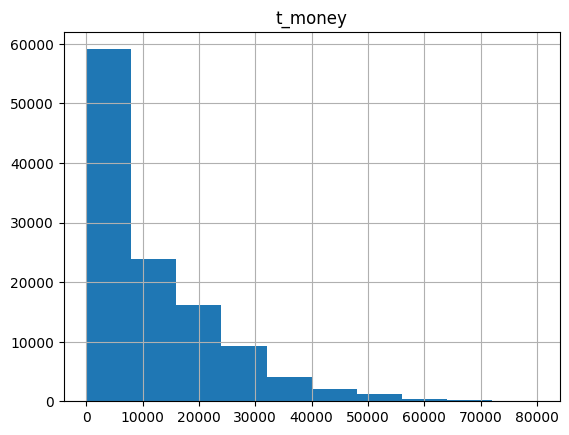

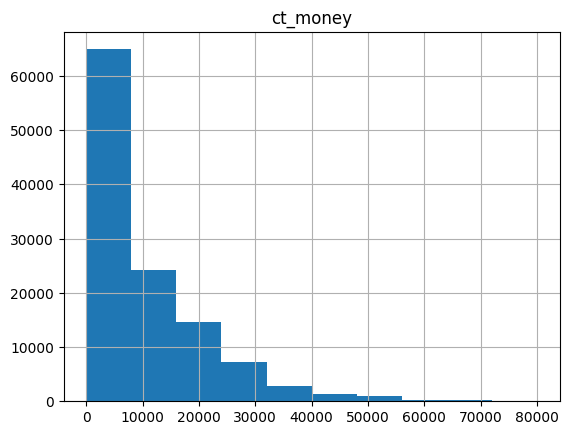

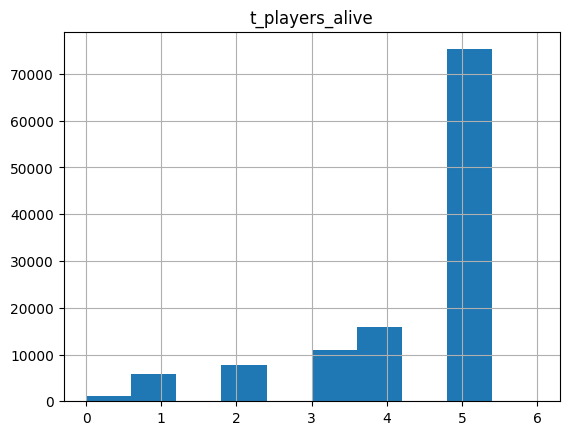

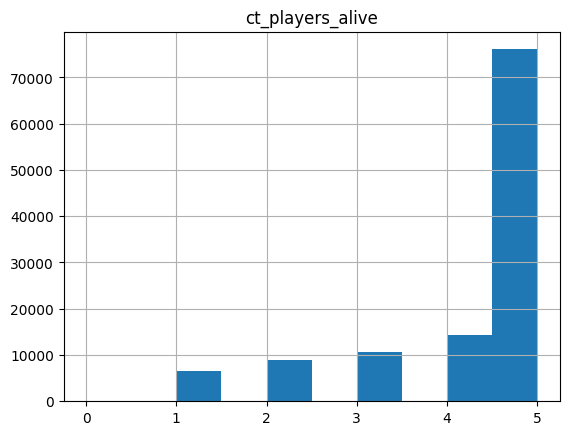

In [30]:
columns = ['time_left', 't_score', 'ct_score', 't_health', 'ct_health', 't_armor', 'ct_armor', 't_money', 'ct_money', 't_players_alive', 'ct_players_alive']

for column in columns:
    data.hist(column)

**Заключение**

- Выбросы затрудняют чтение данных о счёте CT/T, о прошедшем времени и о количестве денег CT/T;
- На гистограмме данные количества денег CT/T, счёт CT/T смещены влево, а здоровье CT/T смещены вправо;
- Тогда среднее значение обычно МЕНЬШЕ медианы для смещённых влево и БОЛЬШЕ для смещённых в право;
- Так же max у 't_health' и 't_players_alive' - 6, что не должно являться правдой, т.к. на гистограмме видно, что эти значения являются выбросами, считаю, что данные с такими значениями стоит исключить.

array([[<Axes: title={'center': 't_health'}>]], dtype=object)

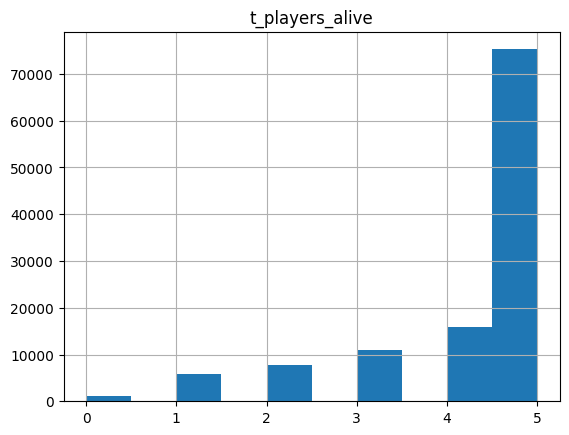

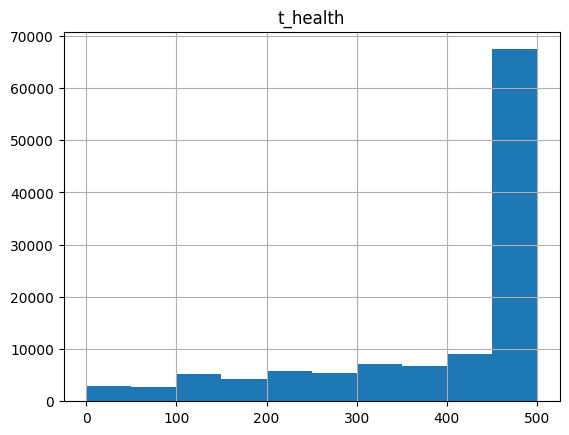

In [31]:
data = data[data['t_players_alive'] < 6]
data.hist('t_players_alive')
data.hist('t_health')

## Изучение и обработка выбросов

Учитывая приведенные выше результаты, столбцы, содержащие выбросы, — это 'time_left', 't_score', 'ct_score', 't_money', 'ct_money', 't_players_alive' и 'ct_players_alive'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [32]:
outlier = data[['time_left', 't_score', 'ct_score', 't_money', 'ct_money', 't_players_alive', 'ct_players_alive']]
outlier

,time_left,t_score,ct_score,t_money,ct_money,t_players_alive,ct_players_alive
0,175.00,0,0,4000,4000,5,5
1,156.03,0,0,650,600,5,5
2,96.03,0,0,500,750,4,4
3,76.03,0,0,500,750,4,4
4,174.97,0,1,10750,18350,5,5
...,...,...,...,...,...,...,...
122405,15.41,14,11,5950,100,4,2
122406,174.93,15,11,23900,11500,5,5
122407,114.93,15,11,6700,1200,5,5
122408,94.93,15,11,6700,1200,5,5


In [33]:
# Нижний предел

Q1 = outlier.quantile(0.25)
Q1

time_left             54.9
t_score                3.0
ct_score               3.0
t_money             1650.0
ct_money            1300.0
t_players_alive        4.0
ct_players_alive       4.0
Name: 0.25, dtype: float64

In [34]:
# Верхний предел

# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

time_left             114.96
t_score                11.00
ct_score               10.00
t_money             18400.00
ct_money            15100.00
t_players_alive         5.00
ct_players_alive        5.00
Name: 0.75, dtype: float64

In [35]:
# IQR-оценки

IQR = Q3-Q1

# Отфильтрованные данные, из которых удалены выбросы

data_filtered = outlier[~((outlier < (Q1 - 2 * IQR)) |(outlier > (Q3 + 2 * IQR))).any(axis=1)]
data_filtered

,time_left,t_score,ct_score,t_money,ct_money,t_players_alive,ct_players_alive
0,175.00,0,0,4000,4000,5,5
1,156.03,0,0,650,600,5,5
2,96.03,0,0,500,750,4,4
3,76.03,0,0,500,750,4,4
4,174.97,0,1,10750,18350,5,5
...,...,...,...,...,...,...,...
122405,15.41,14,11,5950,100,4,2
122406,174.93,15,11,23900,11500,5,5
122407,114.93,15,11,6700,1200,5,5
122408,94.93,15,11,6700,1200,5,5


In [36]:
# Копирование индексов

index_list = list(data_filtered.index.values)

In [37]:
# Хранить данные без выбросов в отдельном DataFrame.

data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,health_lead,armor_lead,money_lead,helmets_lead,players_alive_lead
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,5,5,2,2,2,2,2
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,1,5,5,2,0,1,2,2
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,1,4,4,1,0,0,2,2
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,1,5,5,2,0,0,2,2


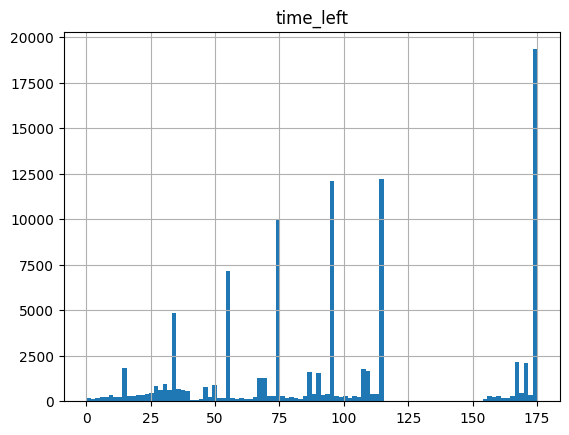

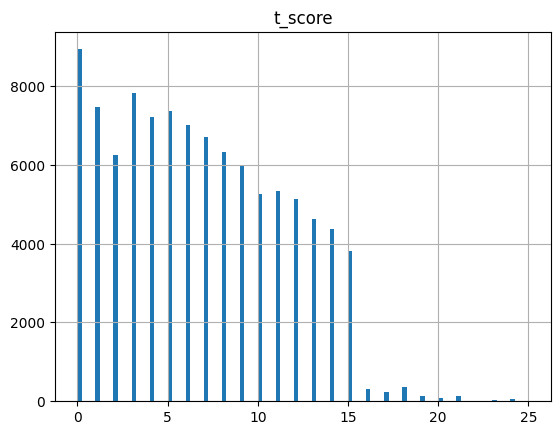

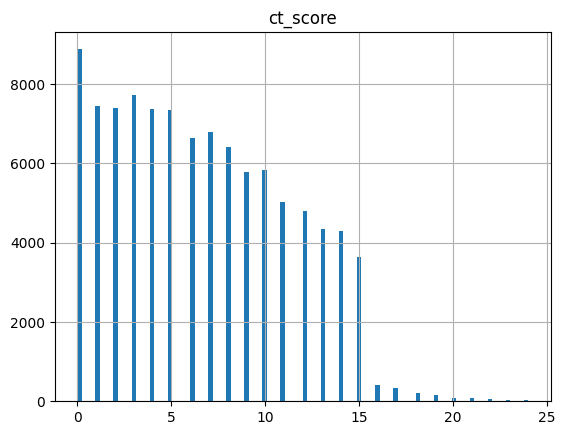

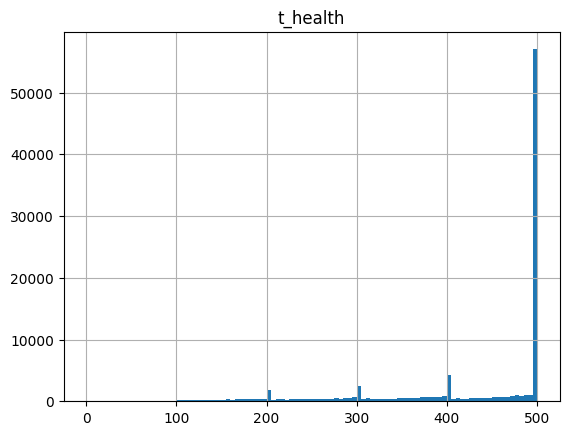

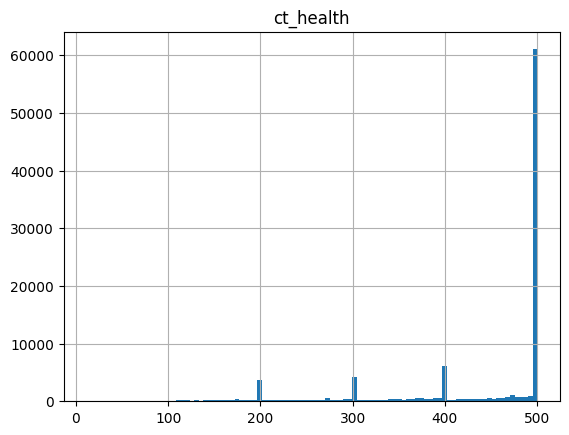

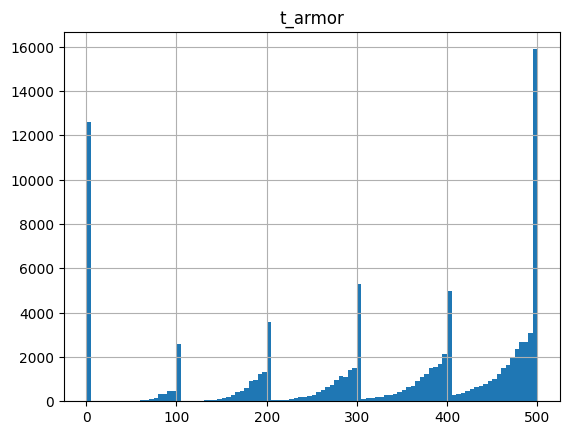

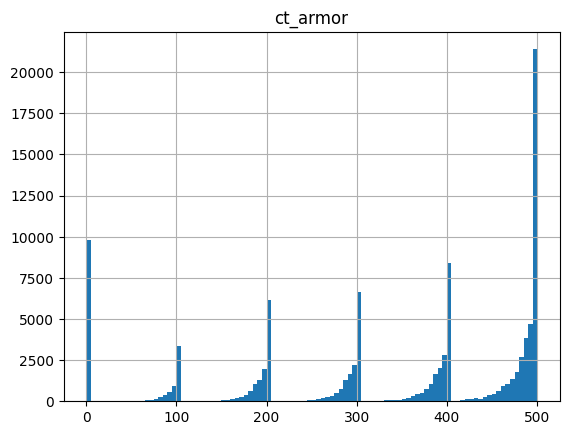

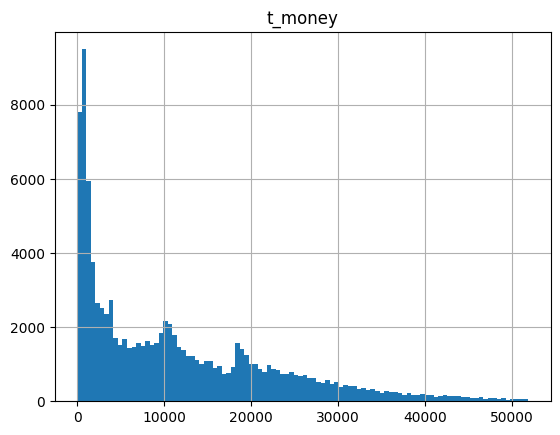

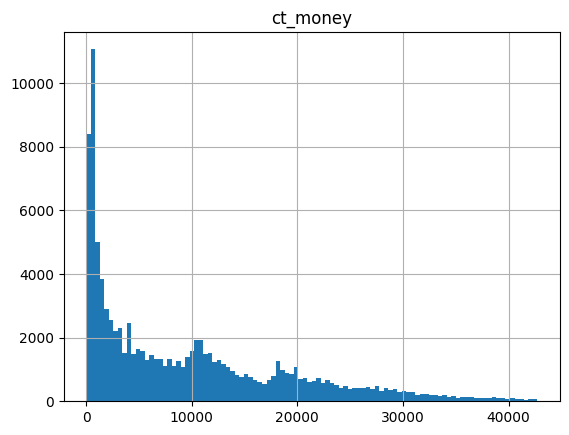

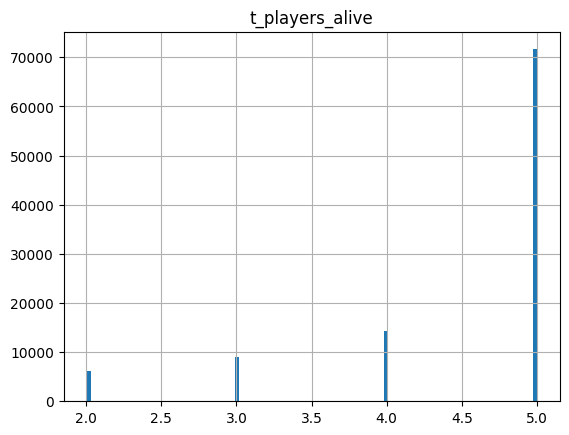

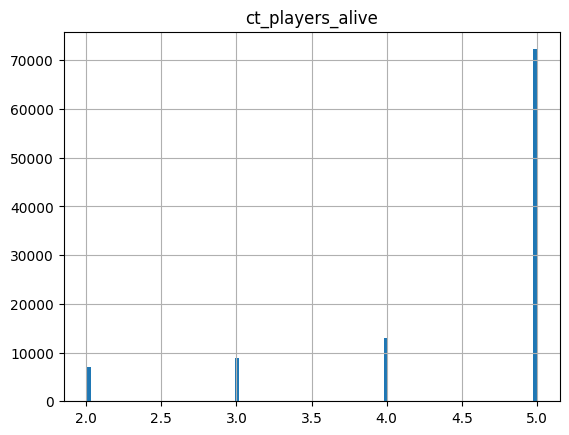

In [38]:
# создать гистограмму с отфильтрованным выбросом

filtered_outlier = data_filtered[['time_left', 't_score', 'ct_score', 't_health', 'ct_health', 't_armor', 'ct_armor', 't_money', 'ct_money', 't_players_alive', 'ct_players_alive']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

## Изучение основных параметров без выбросов

В этом разделе отфильтрованные данные будут использоваться для построения новых графиков по сравнению с предыдущими, которые включали выбросы.

Выбросы затрудняют чтение данных о счёте CT/T, о прошедшем времени и о количестве денег CT/T;

[[<Axes: title={'center': 'ct_score'}>]]
[[<Axes: title={'center': 'ct_score'}>]]


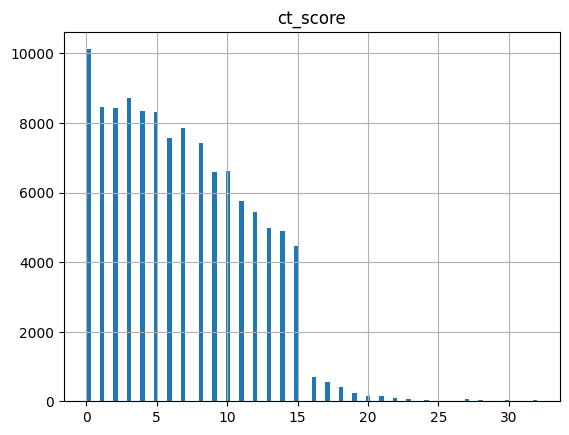

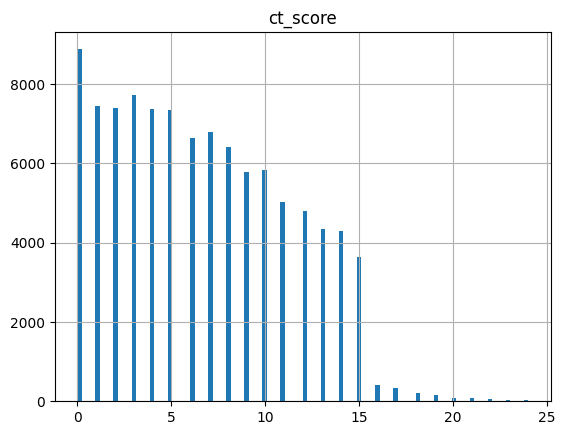

In [39]:
# Сравнение счёта CT с выбросами и без

print(data.hist('ct_score', bins=100))
print(data_filtered.hist('ct_score', bins=100))

[[<Axes: title={'center': 't_score'}>]]
[[<Axes: title={'center': 't_score'}>]]


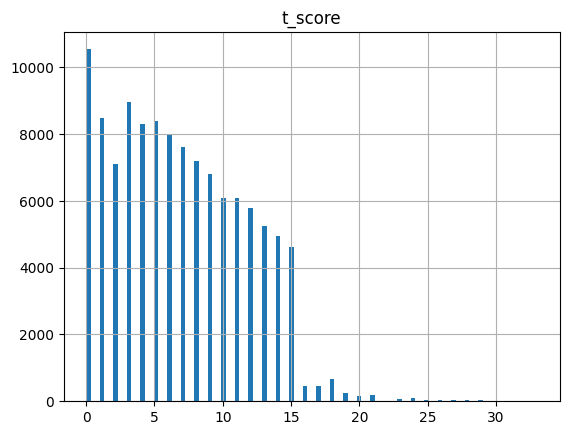

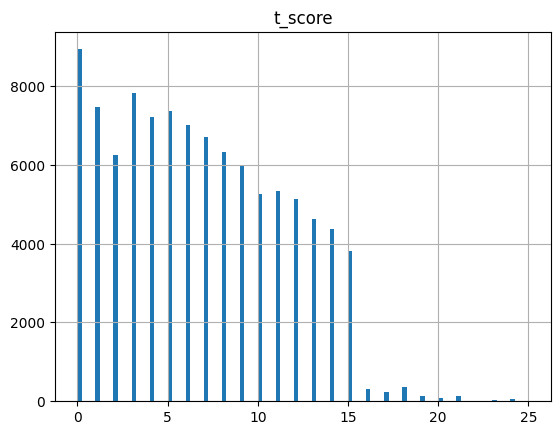

In [40]:
# Сравнение счёта T с выбросами и без

print(data.hist('t_score', bins=100))
print(data_filtered.hist('t_score', bins=100))

**Заключение**:
- Разброс количества раундов у CT и T был уменьшен с 33 до 25, но графики всё так же завалены влево, так что среднее значение меньше медианного.

[[<Axes: title={'center': 'time_left'}>]]
[[<Axes: title={'center': 'time_left'}>]]


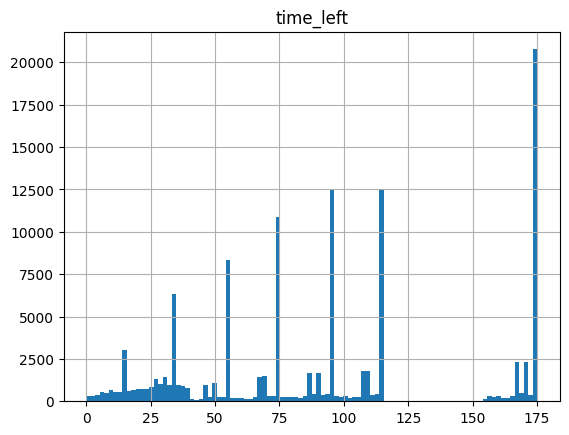

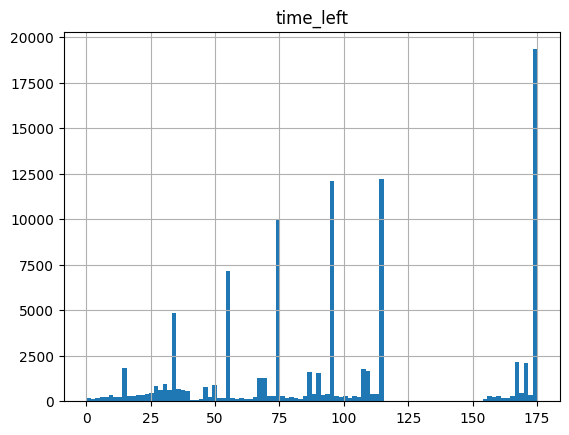

In [41]:
# Сравнение времени раунда с выбросами и без

print(data.hist('time_left', bins=100))
print(data_filtered.hist('time_left', bins=100))

**Заключение**:
- К сожалению изменить выбросы у 'time_left' т.к. выбросы находятся посреди распределения, если при помощи метода DBSCAN провести кластеризацию, то можно увидеть, что в диапазоне приблизительно 115 - 155 отсутствуют какие-либо значения.
- Судя по гистограмме наибольшее количество раундов длится максимальное время, отведённое на раунд, также по графику, не учитывая 175 секунд, видно, что раунды заканчиваются очень часто в 6 конкретных моментов, возможно частота такого времени зависит от тактик, которые применяют во время игры.

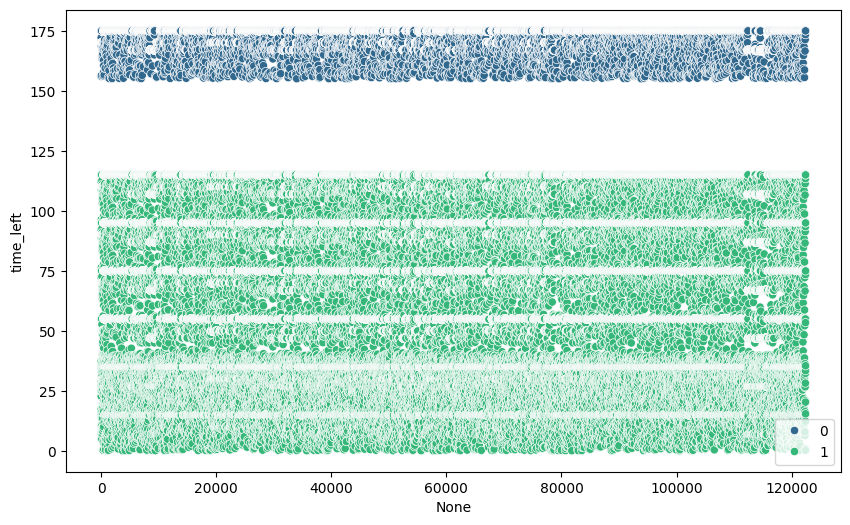

In [42]:
# График кластеров по времени раунда

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data[['time_left']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['time_left'], hue=clusters, palette='viridis')
plt.show()

[[<Axes: title={'center': 'ct_money'}>]]
[[<Axes: title={'center': 'ct_money'}>]]


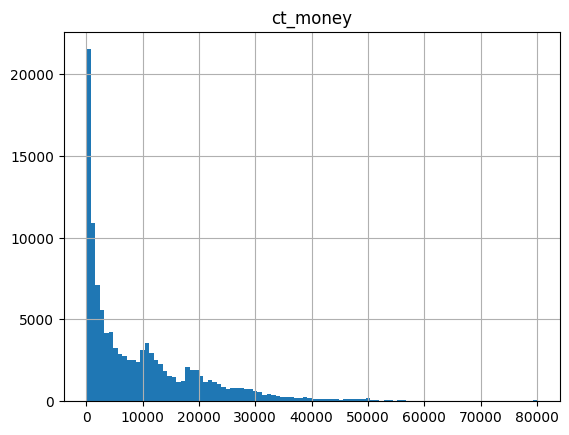

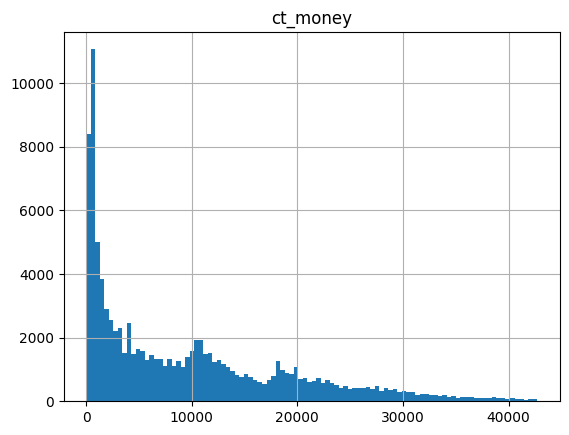

In [43]:
# Сравнение количества денег CT с выбросами и без

print(data.hist('ct_money', bins=100))
print(data_filtered.hist('ct_money', bins=100))

[[<Axes: title={'center': 't_money'}>]]
[[<Axes: title={'center': 't_money'}>]]


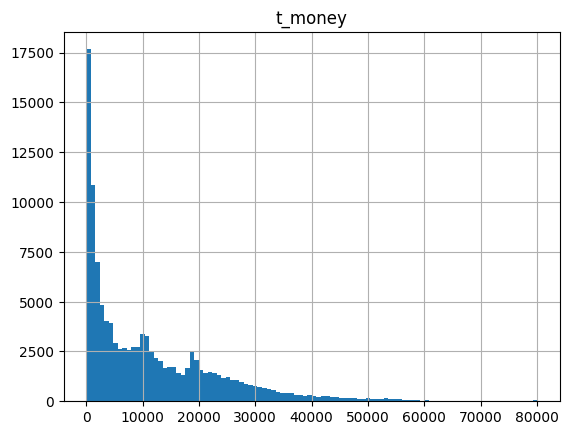

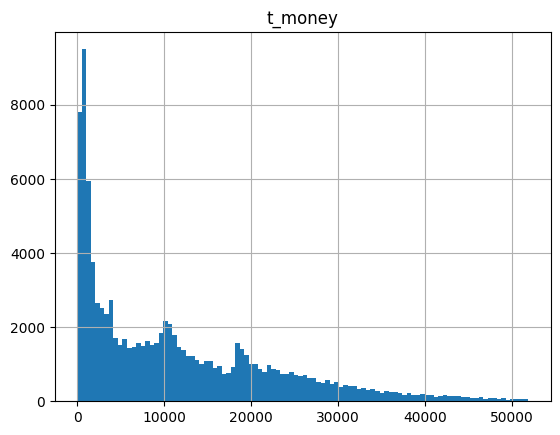

In [44]:
# Сравнение количества денег T с выбросами и без

print(data.hist('t_money', bins=100))
print(data_filtered.hist('t_money', bins=100))

**Заключение**:
- Разброс количества денег у T был уменьшен с 80000 до 50000, у CT с 80000 до 40000, но графики по прежнему отклонены влево, значит среднее меньше медианного.
- На гистограммах без выбросов видно, что большая часть общего количества денег у команд CT/T на раунд распределено в диапазоне от 0 до 20000, также можно увидеть, что распределение количества выигранных раундов у обеих команд распределено в диапазоне от 0 до 15, количество выигранных раундов начиная с 16 очень сильно падает;

# Нахождение зависимостей 'bomb_planted' с другими признаками

Здесь будут рассмотрены зависимости 'bomb_planted' от других признаков

In [45]:
correlation_matrix = data[['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'health_lead', 'armor_lead', 'money_lead', 'helmets_lead', 'players_alive_lead']].corr()
bomb_planted_correlation = correlation_matrix[['bomb_planted']]
print(bomb_planted_correlation)

                    bomb_planted
time_left              -0.487283
ct_score               -0.021255
t_score                -0.014489
bomb_planted            1.000000
ct_health              -0.616312
t_health               -0.440907
ct_armor               -0.304425
t_armor                -0.112695
ct_money               -0.201790
ct_helmets             -0.201630
t_helmets              -0.069511
ct_defuse_kits         -0.167424
ct_players_alive       -0.621861
t_players_alive        -0.393000
health_lead            -0.209756
armor_lead              0.075966
money_lead              0.047594
helmets_lead            0.036796
players_alive_lead     -0.240503


In [ ]:
# Крамер V (корреляция для категориальных данных)

contingency_table = pd.crosstab(data_filtered['map'], data_filtered['bomb_planted'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Chi2: {chi2:.3f}, p-value: {p:.5f}, Cramer’s V: {cramer_v:.3f}")

Chi2: 198.801, p-value: 0.00000, Cramér’s V: 0.044


**Заключение**

- В таблице можно увидеть большое количество корреляций с отрицательным коэффициентом, это говорит о том, что у признаков наблюдается обратная зависимость
- Дальше изучим зависимости 'bomb_planted' от тех признаков, где корреляция больше модуля 0.3;
- Cramer`s V между 'bomb_planted' и 'map' < 0, значит между этими признаками практический нет никакой связи, значит по данному показатели делать какие-то выводы бессмысленно.

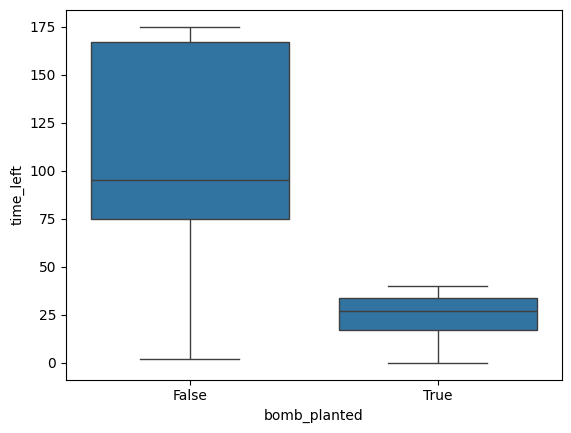

In [47]:
# Зависимость 'bomb_planted' от 'time_left'

sns.boxplot(x='bomb_planted', y='time_left', data=data_filtered)
plt.show()

**Заключение**

- Как видно из графика, большинство игроков не поставляли бомбу в течение первых 20 секунд раунда, что указывает на то, что до точек заклада игрокам необходимо добраться;
- Большинство установок бомбы заключено в диапазоне от 20 до 35 секунд, это указывает на то, что большое количество игроков использовали тактику 'fast rush', т.е. 'быстрое наступление';
- Видно, что чем дольше длится раунд тем меньше установленно, бомб, т.е. можно выдвинуть такую гипотезу: чем дольше длится раунд, тем меньше шансов на установку бомбы;

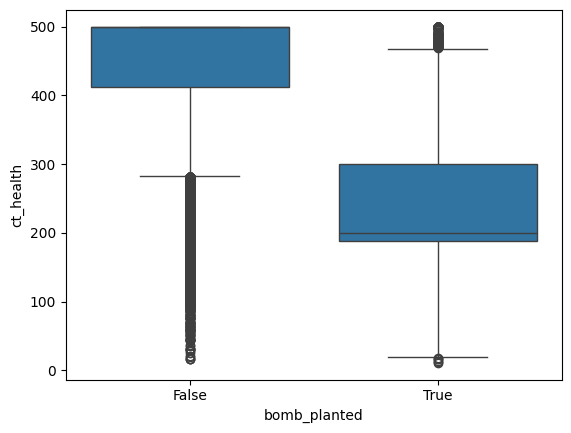

In [48]:
# Зависимость 'bomb_planted' от 'ct_health'

sns.boxplot(x='bomb_planted', y='ct_health', data=data_filtered)
plt.show()

**Заключение**

- По графику видно, что чаще всего бомба не устанавливалась в тех случаях, когда у игроков CT было наибольшее количество очков здоровья, а установка в свою очередь происходила чаще всего тогда, когда у игроков CT здоровье было в диапазоне от 200 до 300 очков здоровья;
- Можно увидеть большое количество выбросов у значения False, но наглядно видно, что когда здоровье у CT стороны количество очков здоровья более 300, шансы на установку бомбы уменьшаются;
- Можно выдвинуть следующую гипотезу: чем больше здоровья у CT стороны, тем меньше шансы на установку бомбы, но шансы становятся максимальными в том случае, если у CT стороны значение очков здоровья является близко к медианному.

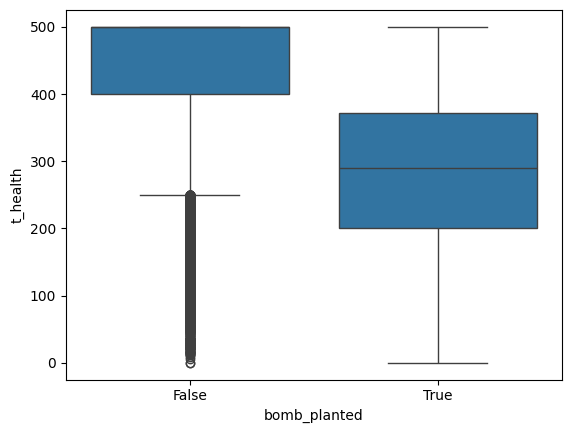

In [49]:
# Зависимость 'bomb_planted' от 't_health'

sns.boxplot(x='bomb_planted', y='t_health', data=data_filtered)
plt.show()

**Заключение**

- По графику видно, что большинство бомб не устанавливались в тех случаях, когда у игроков T было наибольшее количество очков здоровья, а установка в свою очередь происходила чаще всего тогда, когда у игрок здоровье находилось в диапазоне от 200 до 380;
- Учитывая графики зависимости от 'ct_health' и 't_health' можно понять, что когда количество очков здоровья у обеих сторон является максимальным, то шансы на установку бомбы малы, видимо CT сторона переигрывает T сторону, в таких случаях;
- Можно выдвинуть следующую гипотезу: чем больше очков здоровья у T стороны, тем меньше шансы на установку бомбы, в случае, когда количество очков здоровья T стороны находится в диапазоне 300+-80, то шансы на установку бомбы очень велики.

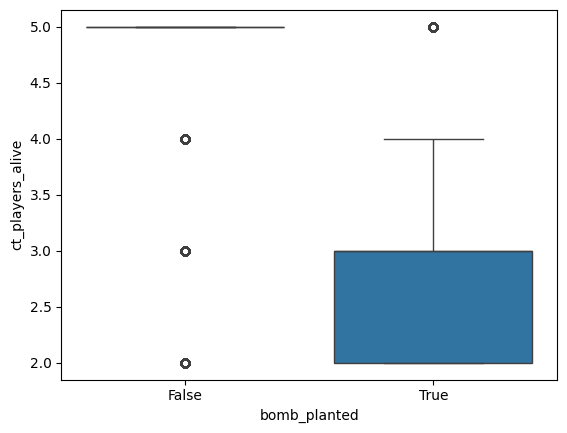

In [50]:
# Зависимость 'bomb_planted' от 'ct_players_alive'

sns.boxplot(x='bomb_planted', y='ct_players_alive', data=data_filtered)
plt.show()

**Заключение**

- По графику наглядно видно, что бомба, не учитывая выбросы, не устанавливалась, когда количество живых CT игроков выше 4, но чаще всего устанавливалась в тех случаях когда CT игроков 2 или 3;
- Модно выдвинуть гипотезу: если игроков защиты более чем 3, то шансы на установку бомбы близки к нулю, если игроков 2 или 3, то шансы на установку велики.

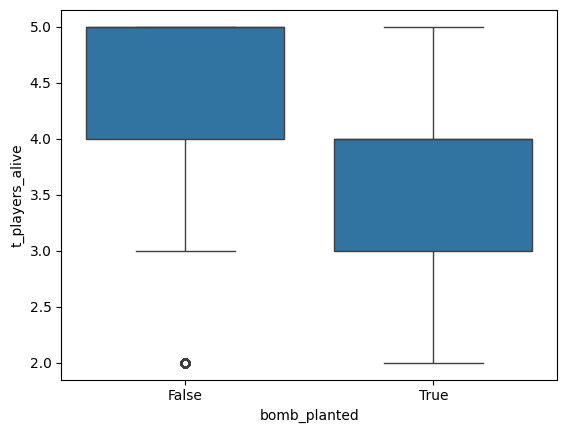

In [51]:
# Зависимость 'bomb_planted' от 't_players_alive'

sns.boxplot(x='bomb_planted', y='t_players_alive', data=data_filtered)
plt.show()

**Заключение**

- По графику видно, что бомба, не учитывая выбросы, не устанавливалась, когда количество живых T игроков 4 или 5, но чаще всего устанавливалась в тех случаях когда T игроков 3 или 4, т.е. когда игроков наступления равно 4, то шансы на бомба устанавливалась и не устанавливалась практический идентично;
- Если количество игроков T близко к максимальному, то шансы на установку минимальны, когда же количество игроков 3 или 4 шансы велики, как уже сказано выше при количестве равном 4 шансы примерно равны.

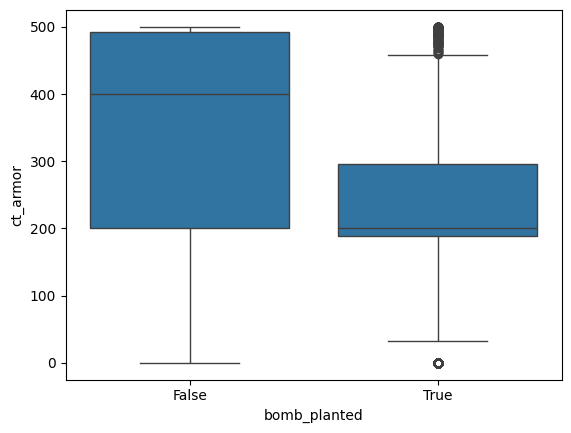

In [52]:
# Зависимость 'bomb_planted' от 'ct_armor'

sns.boxplot(x='bomb_planted', y='ct_armor', data=data_filtered)
plt.show()

**Заключение**

- По графику видно, что бомба не устанавливалась в тех случаях, когда у CT стороны броня ниже 40 единиц и более 450, в основном бомба устанавливалась когда сторона защиты имела броню в диапазоне от 200 до 300 единиц;
- Можно выдвинуть следующую гипотезу: чем больше у CT стороны единиц брони, тем меньше шанс на установку бомбы, шанс на установку будет максимальным, если сторона защиты имеет 200-300 единиц брони.

# Общие выводы:

Этот проект призван изучить данные и определить, какие факторы влияют на установку бомбы в игре CS:GO. Вначале, после загрузки данных и всех необходимых библиотек, образцы данных и общее резюме выводятся на экран для их анализа. Необходимо выявить "аномальные" данные, отсутствующие значения и некорректные типы данных.

Заполнить пропущенные значения, сравнив их с другими столбцами (если они связаны):

- Пропущенные значения в столбцах 't_score', 't_helmets', 't_health', 'ct_helmets', 'ct_defuse_kits', 't_players_alive';
- Пропущенные значения в столбце 't_score' на основе 'ct_score' и 'map';
- Пропущенные значения в столбце 't_players_alive' на основе 't_score', 'ct_score';
- Пропущенные значения в столбце 't_helmets' на основе 't_armor', 't_money';
- Пропущенные значения в столбце 't_health' на основе 't_armor', 't_helmets';
- Пропущенные значения в столбце 'ct_helmets' аналогично 't_helmets';
- Пропущенные значения в столбце 'ct_defuse_kits' на основе 'ct_players', 'ct_money';
- Пропущенные значения в столбце 'map' на 'unknown' т.к. связи с другими признаками датасета отсутствует, а так же количество пропущенных значений очень мало, значит такое заполнение практически не повлияет на статистику.

**Изменение типа данных:**

- Изменить тип значений всех столбцов с таким типом как float кроме 'time_left' на int;

**Редактирование данных:**

- Добавил значения лидирующей стороны для таких значений как: здоровье, броня, количество шлемов, количество живых, количество денег;
- Проверка дублированных данных и их удаление

**Проверка выбросов:**

- Выбросы параметров: время раунда, счёт обеих сторон, количество денег у обеих сторон, количество живых у обеих сторон;
- На гистограмме данные количества денег CT/T, счёт CT/T смещены влево, а здоровье CT/T смещены вправо.

**Удаление выбросов:**

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame;
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов;
- Избавиться от выбросов в столбце 'time_left' не получилось, т.к. они находятся посреди данных, сильное смещение верхней границы удалило большое количество важных данных.

**Изучение факторов влияющих на установку бомбы:**

Факторы, влияющие на цену: время раунда, здоровье обеих команд, количество единиц брони CT, количество живых в обеих командах.
Все показатели используют метод коробчатой диаграммы.

*Время раунда*

Время раунда повлияло на установку бомбы. Это означает чем дольше длился раунд, тем меньше шансов у команды атакующих на установку бомбы, предположительно на это влияла тактика T стороны.

*Здоровье обеих команд*

Показатель здоровья стороны атакующих повлиял на установку бомбы менее, чем показатель здоровья у команды защиты. Зависимость установки бомбы от здоровья CT стороны довольно большая. Одна установка бомбы коррелирует от показателей здоровья обеих команд идентично, можно сделать вывод, что сторона защиты при большом количестве здоровья у обеих команд переигрывает команду атакующих.

*Количество единиц брони CT*

Данный показатель незначительно влияет на шансы установки бомбы. Коэффициент корреляции отрицательный, значит, что чем выше показатель брони у CT, тем меньше шансов на установку бомбы.

*Количество живых в обеих командах*

Аналогично ситуации со здоровьем обеих команд, показатель живых террористов повлиял на установку менее, чем показатель живых контр-террористов. Зависимость установки бомбы от количества живых CT также очень велик. Учитывая оба графика можно сказать, что шансы на установку практически отсутствуют при живых 5 контр-террористов и 4-5 террористов, одна при медианном значении обеих команд (3), шанс на установку является максимальным. 

*Дополнительно*

- Количество здоровья у обеих команд чаще одинаково, но не учитывая это, можно сказать, что контр-террористы в большинстве превосходят террористов по этому показателю;
- По количеству брони также контр-террористы превосходят террористов;
- По количеству денег T сторона имеет разницу с CT стороной в свою пользу;
- По количеству шлемов на команду террористы безоговорочны выигрывают контр-террористов, показатель в два раза выше;
- По количеству выживших показатели практически идентичны.